### Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Вариант 9

In [2]:
feats_1 = np.array([
    [-1.1, -4.3],
    [ 1.8, -1],
    [ 4.8, -1],
    [ 1.2, -3.5],
    [-1.2, -3.4],
    [ 2.5,  3.7],
])
labels_1 = np.array([0, 1, 1, 1, 0, 1])

feats_2 = np.array([
    [4.6,   1.7],
    [-1,    4.3],
    [-0.3, -2.7],
    [-1.1,  2],
    [ 0.5,  2.5],
    [ 4.9,  4.6],
    [ 0.3,  4.6],
    [-3.9, -4.5],
])
labels_2 = np.array([
    [1, 1],
    [0, 0],
    [1, 1],
    [1, 0],
    [1, 0],
    [1, 0],
    [0, 0],
    [1, 1],
])

In [3]:
#### Broken

class Perceptron():
    def __init__(self, input_size, output_size):
        self._W = np.random.normal(0, 1.0/np.sqrt(input_size), (output_size, input_size))
        self._b = np.zeros((output_size, ))
        
    def configure(self, *, epoch=5, learning_rate=0.1):
        if epoch < 1:
            raise ValueError("Epoch cannot be lower than 1")
        self._epoch         = epoch
        self._learning_rate = learning_rate
        
    def train(self, train_data, train_targets):
        if train_targets.ndim == 1:
            # Each sample has one label
            # Turn into column for ease of calculation
            train_targets = train_targets.copy().reshape(-1, 1)
        
        if not self._test_configured():
            raise ValueError("Perceptron is not configured")

        for _ in range(self._epoch):
            for x, y in zip(train_data, train_targets):
                predict = self._predict(x)
            predicts = self._predict(train_data)
            errors   = self._mean_absolute_error(predicts, train_targets)
            
            W_errors = np.dot(errors.T, train_data)
            b_errors = errors.sum(axis=0)
            
            self._W += self._learning_rate * W_errors
            self._b += self._learning_rate * b_errors
            
    def predict(self, input_data):
        return self._predict(input_data)
            
    def _predict(self, input_data):
        heaviside_step = lambda x : 1 if x > 0 else 0
        
        predicts = np.dot(input_data, self._W.T) + self._b
        return np.heaviside(predicts, 0)

    def _test_configured(self):
        return self._epoch is not None and self._learning_rate is not None
        
    def _mean_absolute_error(self, predicts, targets):
        # Per label error
        return predicts - targets


In [4]:
class Perceptron():
    def __init__(self, input_size):
        self._W = np.random.normal(0, 1.0/np.sqrt(input_size), (input_size, ))
        self._b = 0
        self._learn_rate = None
        
    def configure(self, *, learn_rate):
        if learn_rate is not None:
            self._learn_rate = learn_rate
        
    def train(self, train_data, train_targets):
        if self._learn_rate is None:
            raise ValueError("Perceptron learn rate is not configured")

        for x, y in zip(train_data, train_targets):
            p   = self.predict(x)
            err = y - p
            
            self._W += self._learn_rate * err * x
            self._b += self._learn_rate * err

    def predict(self, input_data):
        p = np.multiply(self._W, input_data)
        if p.ndim == 2:
            p = np.sum(p, axis=1)
        else:
            p = np.sum(p)
        p += self._b
        
        return np.heaviside(p, 0)
        
    def get_line(self, points):
        if len(self._W) != 2:
            raise ValueError("Perceptron must have only 2 weights to draw line")
        return np.array([-(self._b + self._W[0] * x) / self._W[1] for x in points])
        
class NNetwork():
    def __init__(self, input_size, output_size):
        self._perceps = [Perceptron(input_size) for _ in range(output_size)]
        self._epoch = None

    def configure(self, *, epoch, learn_rate):
        if epoch is not None:
            if epoch < 1:
                raise ValueError("Epoch cannot be lower than 1")
            self._epoch = epoch
        
        if learn_rate is not None:
            for p in self._perceps: 
                p.configure(learn_rate=learn_rate)
                
    def train(self, train_data, train_targets):
        if train_targets.ndim == 1:
            # Each sample has one label
            # Turn into column for ease of calculation
            train_targets = train_targets.copy().reshape(-1, 1)
        
        if not self._is_configured():
            raise ValueError("Epoch is not configured")

        for _ in range(self._epoch):
            for i, p in enumerate(self._perceps):
                p.train(train_data, train_targets[:, i])
                
    def predict(self, input_data):
        return np.array([p.predict(input_data) for p in self._perceps]).T
        
    def get_perceptron_lines(self, points):
        return np.array([p.get_line(points) for p in self._perceps])
        
    def _is_configured(self):
        return self._epoch is not None

In [5]:
nnet = NNetwork(2, 1)
nnet.configure(epoch=20, learn_rate=0.1)
nnet.train(feats_1, labels_1)

In [6]:
nnet.predict(feats_1)

array([[0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.]])

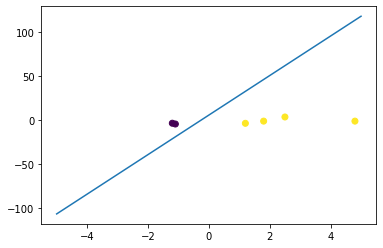

In [7]:
plt.scatter(feats_1[:,0], feats_1[:,1], c=labels_1)
points = [-5, 5]
for line in nnet.get_perceptron_lines(points):
    plt.plot(points, line)

In [8]:
nnet = NNetwork(2, 2)
nnet.configure(epoch=20, learn_rate=0.1)
nnet.train(feats_2, labels_2)

In [9]:
nnet.predict(feats_2)

array([[1., 1.],
       [0., 0.],
       [1., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [1., 1.]])

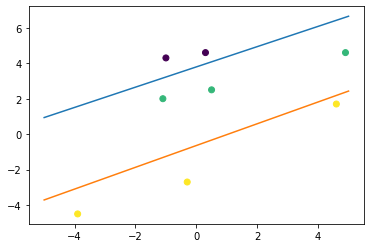

In [10]:
plt.scatter(feats_2[:,0], feats_2[:,1], c=list(map(lambda x : x[0]*2 + x[1], labels_2)))
points = [-5, 5]
for line in nnet.get_perceptron_lines(points):
    plt.plot(points, line)